# Importing initial Library


In [4]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data loading and intial cleaning , Ensuring imputation

In [5]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_Never.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(2072, 62) (2072,)


In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis

In [7]:
intervention=df.iloc[:,-1]
data_min = X.min(axis=0)
data_max = X.max(axis=0)
data_norm = (X-data_min)/(data_max-data_min)

In [8]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

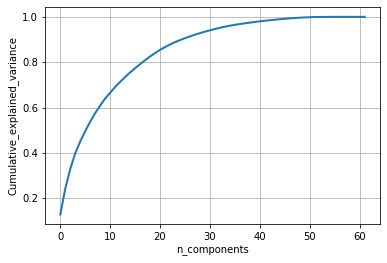

In [9]:
pca.n_components = 62
pca_data = pca.fit_transform(data_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis()
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [10]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

In [11]:
print(pca.components_)

[[ 0.07058463 -0.04097932 -0.22451386 ... -0.0338378   0.00240377
  -0.04431266]
 [-0.18899664  0.42741927 -0.08826662 ... -0.08572435  0.00911207
   0.04414402]
 [-0.0045755  -0.28748322 -0.11269866 ...  0.1604356  -0.00819235
   0.01288256]
 ...
 [-0.06173817 -0.09849334  0.00688518 ...  0.13350567  0.02504569
  -0.01922592]
 [-0.0135859  -0.05716617  0.39731916 ... -0.11363598 -0.00961141
  -0.02669176]
 [ 0.00882168 -0.0774438  -0.30491559 ... -0.11784209 -0.05497345
   0.00643158]]


[0.70089427 0.63172471 0.47328943 0.37598504 0.28460139 0.2475465
 0.23187762 0.20681428 0.180502   0.16939019 0.14093368 0.13789944
 0.12509361 0.11535253 0.11087683 0.10305455 0.09634864 0.09533881
 0.09026703 0.08244361 0.07708005 0.06725683 0.06400344 0.05577805
 0.04824922 0.04733884 0.04266578 0.0420019  0.03638035 0.03595493]
[0.12804021 0.11540423 0.08646108 0.0686854  0.05199132 0.04522209
 0.04235968 0.03778108 0.03297432 0.0309444  0.02574593 0.02519164
 0.02285225 0.02107274 0.02025511 0.01882613 0.01760109 0.01741661
 0.01649009 0.0150609  0.01408108 0.01228656 0.01169222 0.0101896
 0.00881423 0.00864792 0.00779424 0.00767296 0.00664601 0.00656829]


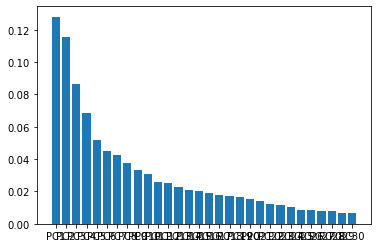

In [12]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.bar(x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","P20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"],height=pca.explained_variance_ratio_)
plt.show()

In [13]:
weights = pca.components_
weights = weights.transpose()
T = data_norm.dot(weights[:,:2])

In [14]:
print(T)

             0         1
0     0.287266  1.281703
1    -1.141563  0.696824
2    -1.163862  0.809625
3     0.740275 -0.030998
4    -1.034381 -0.384441
...        ...       ...
2067 -0.945441 -0.492651
2068 -0.917842 -0.689681
2069  0.534465  0.649372
2070 -0.964882  0.209401
2071 -0.937283  0.012371

[2072 rows x 2 columns]


In [15]:
print(pca.explained_variance_)

[0.70089427 0.63172471 0.47328943 0.37598504 0.28460139 0.2475465
 0.23187762 0.20681428 0.180502   0.16939019 0.14093368 0.13789944
 0.12509361 0.11535253 0.11087683 0.10305455 0.09634864 0.09533881
 0.09026703 0.08244361 0.07708005 0.06725683 0.06400344 0.05577805
 0.04824922 0.04733884 0.04266578 0.0420019  0.03638035 0.03595493]


In [16]:
print(pca.explained_variance_ratio_)

[0.12804021 0.11540423 0.08646108 0.0686854  0.05199132 0.04522209
 0.04235968 0.03778108 0.03297432 0.0309444  0.02574593 0.02519164
 0.02285225 0.02107274 0.02025511 0.01882613 0.01760109 0.01741661
 0.01649009 0.0150609  0.01408108 0.01228656 0.01169222 0.0101896
 0.00881423 0.00864792 0.00779424 0.00767296 0.00664601 0.00656829]


In [17]:
X=pca.transform(data_norm)

# Splitting The data

In [18]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1657, 30) (1657,)
Test set:  (415, 30) (415,)


# Importing All model Building Library

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [20]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)



BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x17C8769E640)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x17C8769E640)

In [23]:
sv.fit(X_train, y_train)

SVC(C=15.0)

In [24]:
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x17C8769E640),
                  n_estimators=100, random_state=7)

In [27]:
EC.fit(X_train, y_train)

ExtraTreesClassifier(max_features=3)

In [28]:
ADC.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [29]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [30]:
LR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [31]:
BCR.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x17C8769E640),
                  n_estimators=100, random_state=7)

In [32]:
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#sv.fit(X_train, y_train)
#gnb.fit(X_train, y_train)
#KNN.fit(X_train, y_train)
#BC.fit(X_train, y_train)
#EC.fit(X_train, y_train)
#ADC.fit(X_train, y_train)
#GBC.fit(X_train, y_train)
#LR.fit(X_train, y_train)
#BCR.fit(X_train, y_train)
#mnb.fit(X_train, y_train)

# Predicting the Value

In [33]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)


# Getting Accuracy and AUC

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)


In [35]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)


In [36]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)

print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)


Decision tree acc: 0.802410
Random forest acc: 0.826506
SVM acc: 0.800000
Nabive Baise acc: 0.792771
KNN: 0.780723
BAGGING: 0.809639
Extra tree: 0.828916
ADC Boosting: 0.785542
GDC Boosting: 0.809639
Logistic: 0.802410
BAGGING Random Forest: 0.814458

Decision tree AUC: 0.536768
Random forest AUC: 0.579360
SVM AUC: 0.682341
gnb AUC: 0.572127
KNN AUC: 0.573812
Bagging AUC: 0.518293
Extra tree AUC: 0.590053
ADC Boosting: 0.590603
GDC Boosting: 0.555061
Logistic: 0.555153
BAGGING Random Forest: 0.539680


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


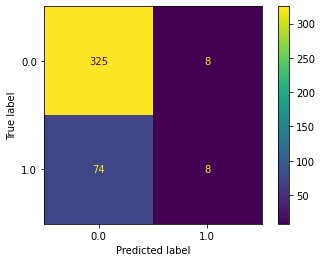

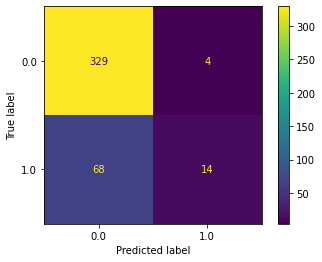

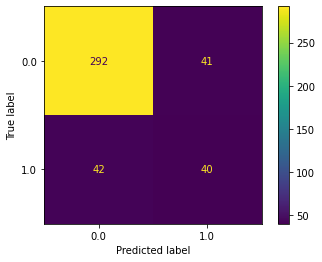

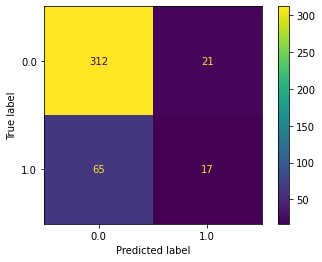

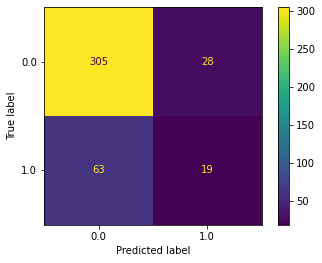

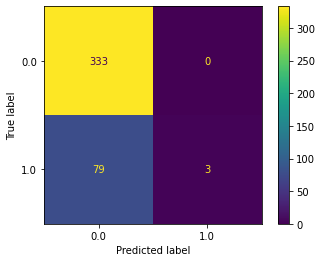

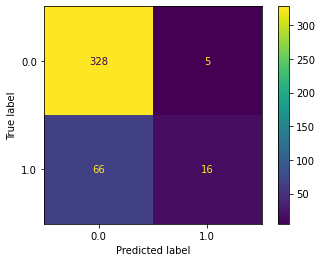

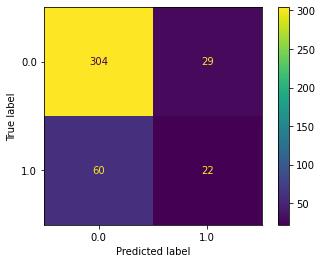

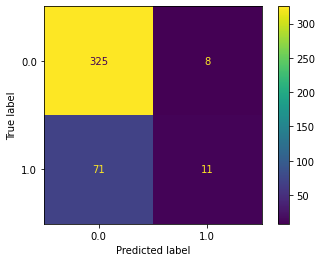

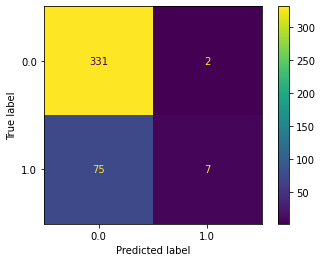

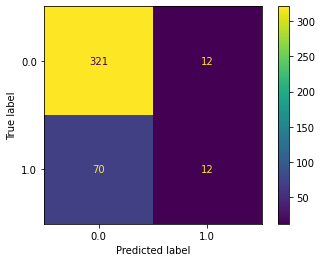

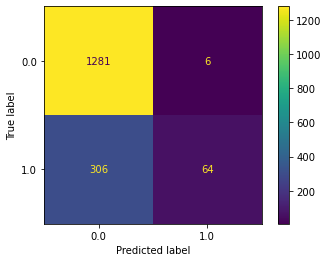

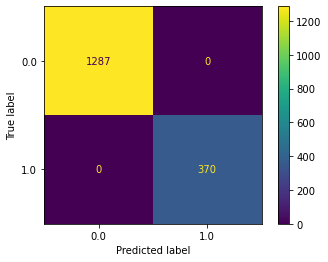

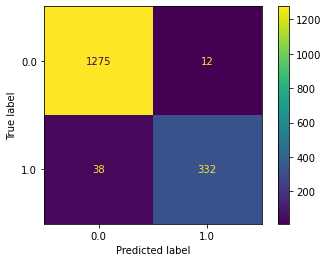

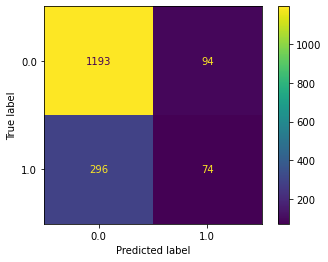

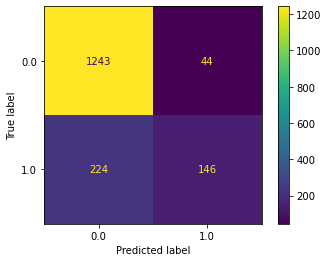

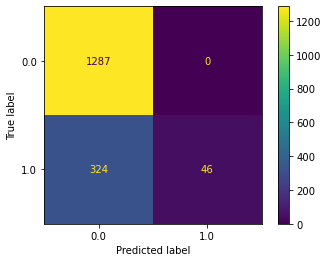

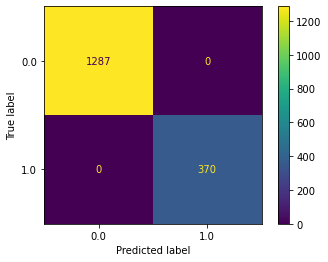

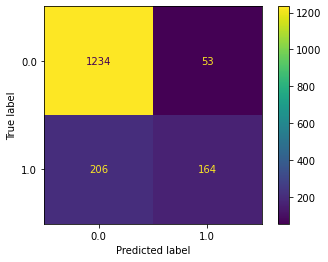

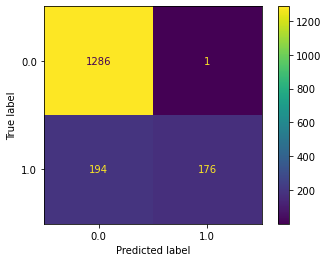

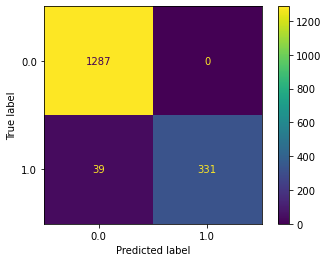

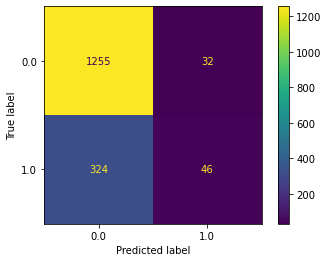

In [37]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)


p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)


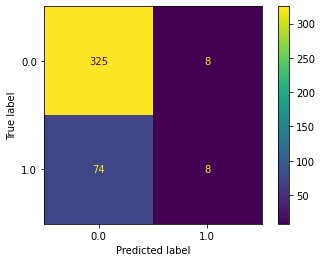

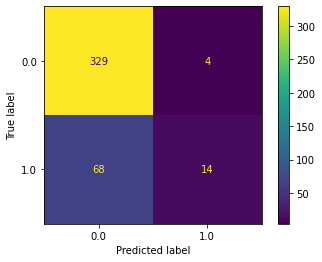

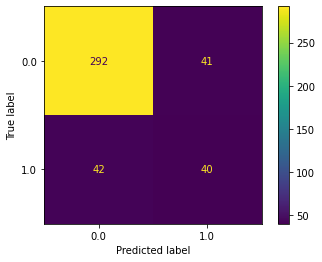

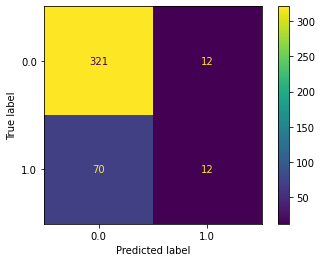

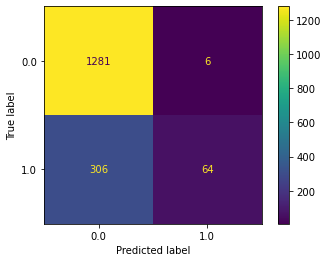

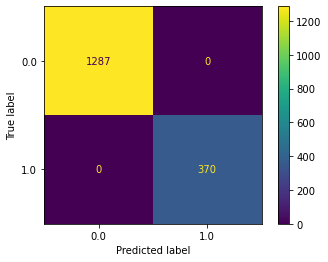

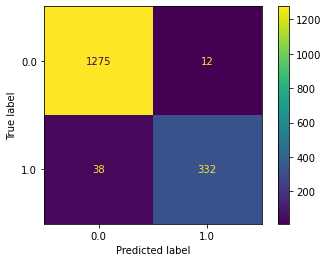

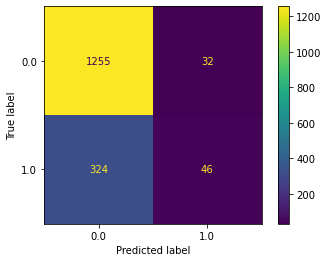

In [38]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

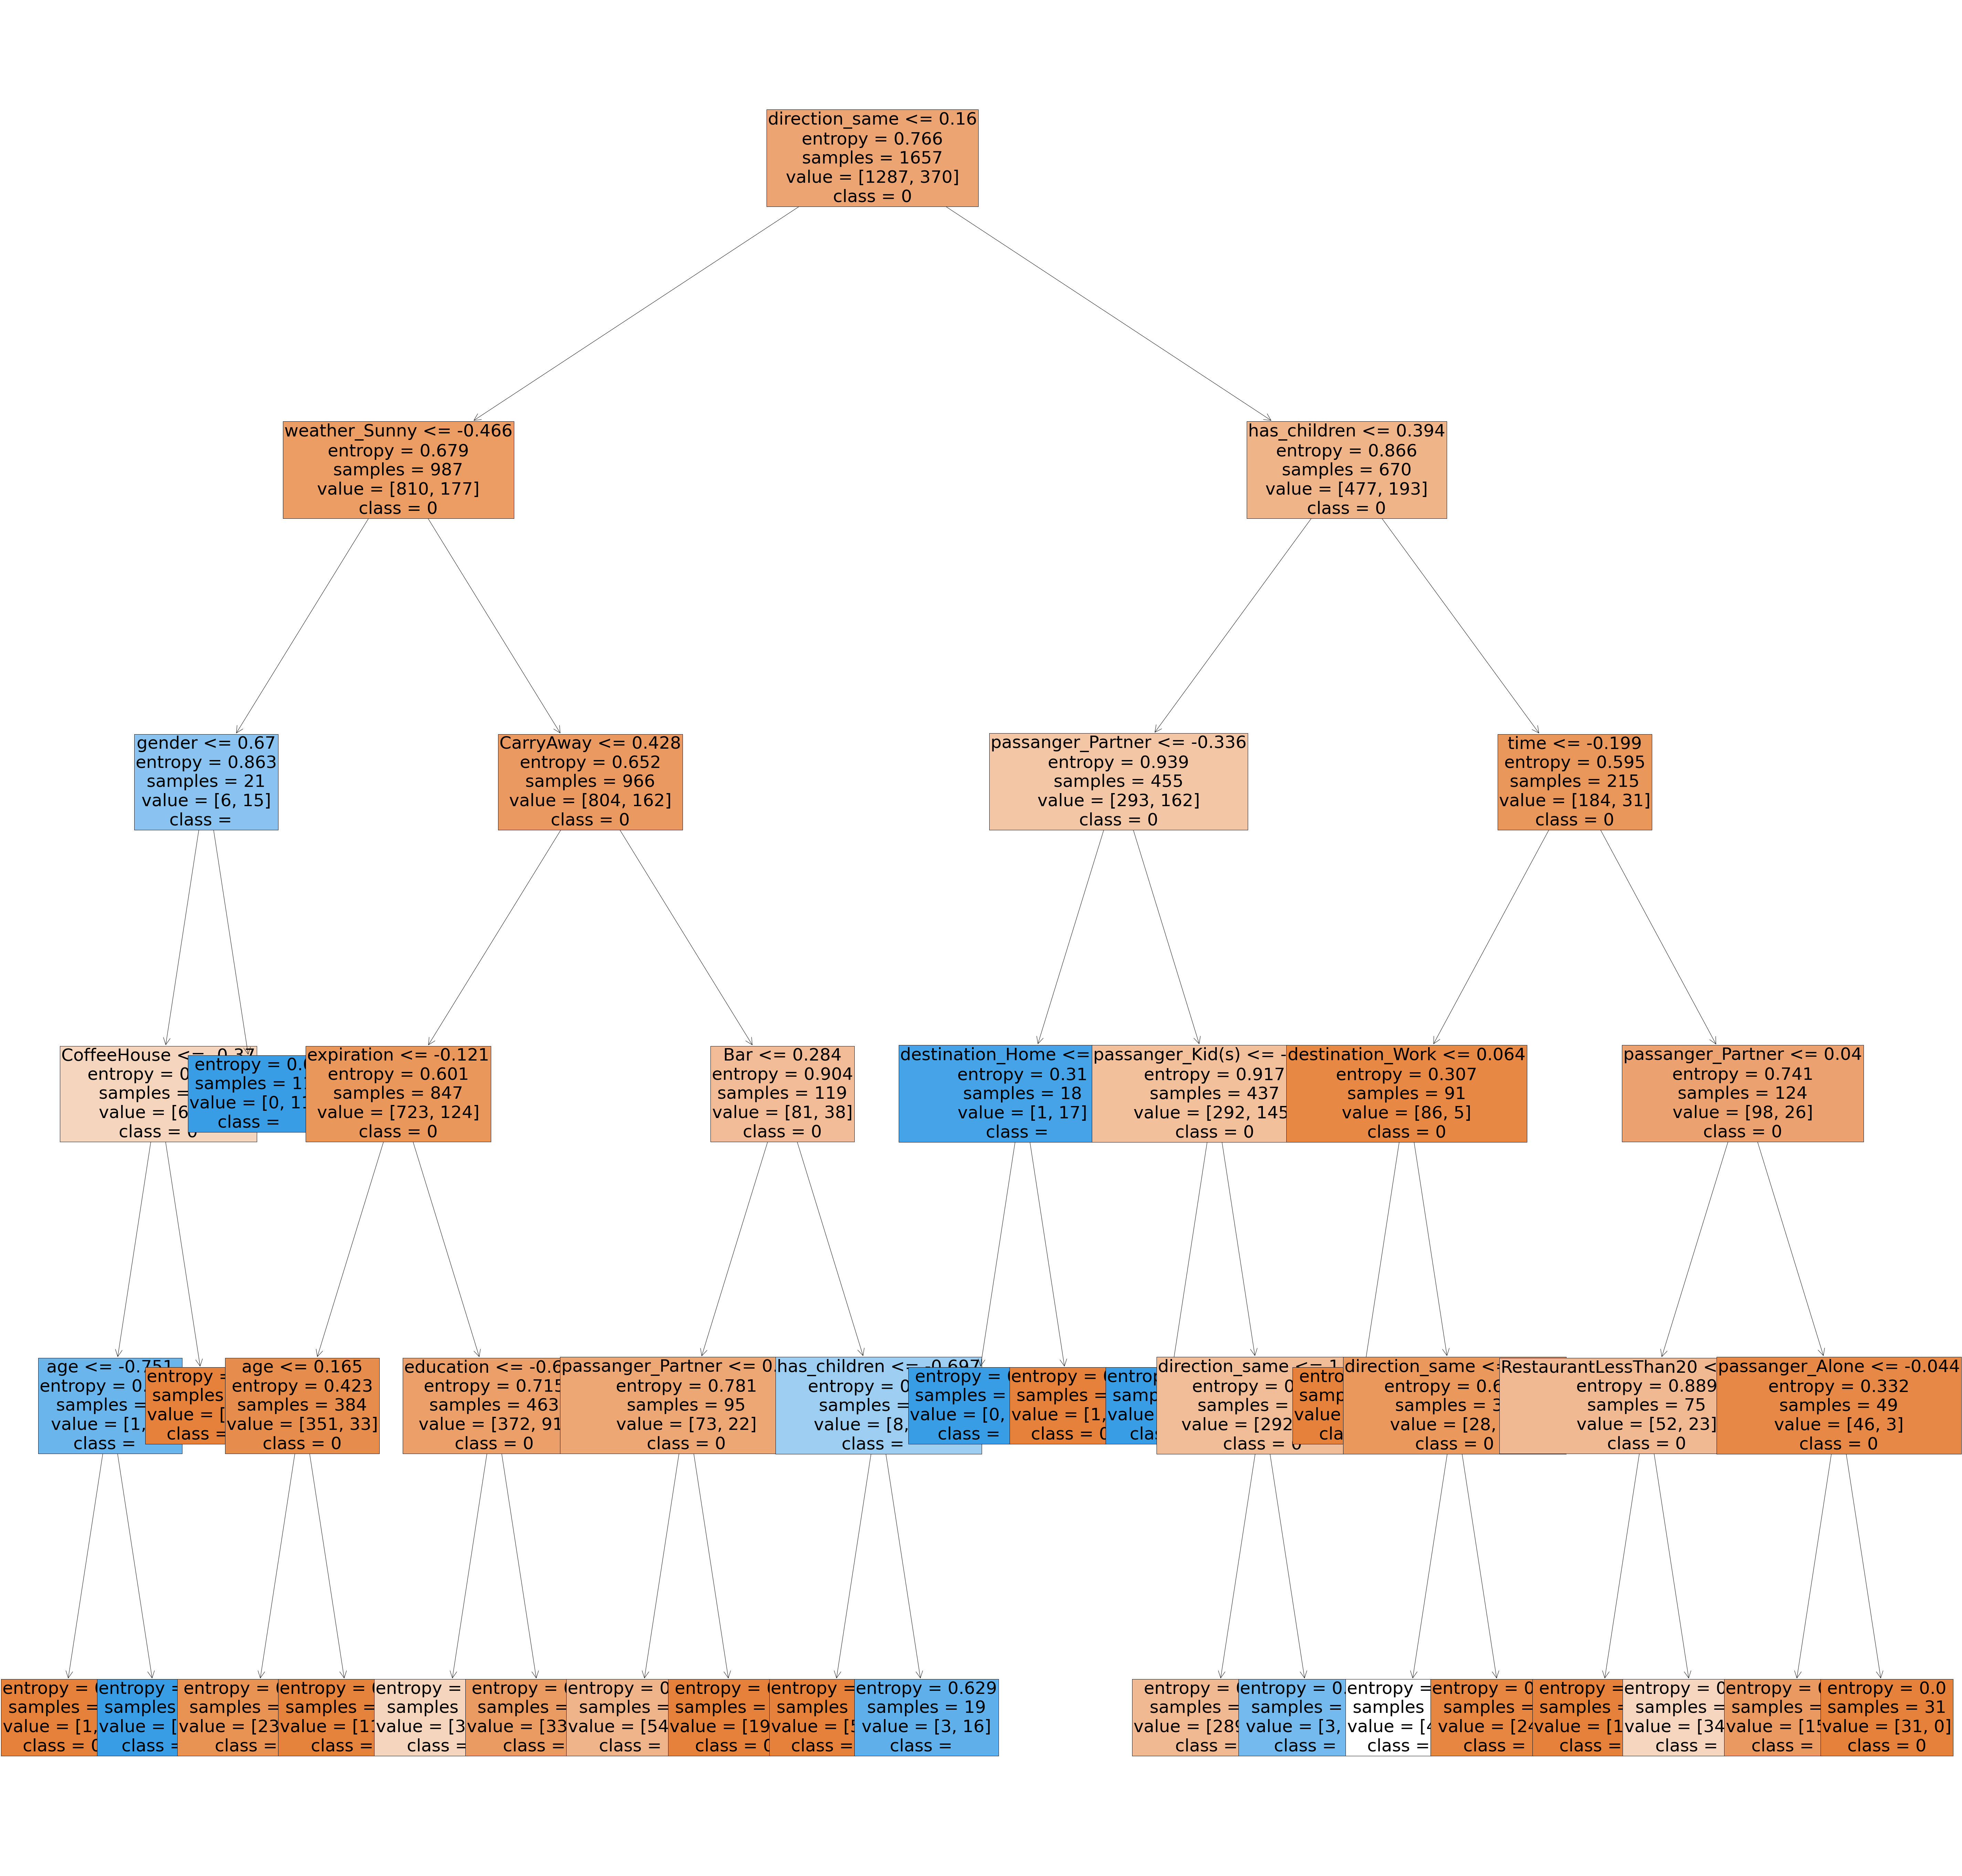

In [39]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_PCA_Never.png')

# Validating the Training set Accuracy


In [40]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)


dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)


dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)


print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)

print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)


Decision tree acc: 0.811708
Random forest acc: 1.000000
SVM acc: 0.969825
Nabive Baise acc: 0.764635
KNN: 0.838262
BAGGING: 0.804466
Extra tree: 1.000000
ADC Boosting: 0.843693
GDC Boosting: 0.882317
Logistic: 0.785154
BAGGING Random Forest: 0.976463

Decision tree AUC: 0.584155
Random forest AUC: 1.000000
SVM AUC: 0.943987
gnb AUC: 0.563481
KNN AUC: 0.680203
Bagging AUC: 0.562162
Extra tree AUC: 1.000000
ADC Boosting: 0.701031
GDC Boosting: 0.737449
Logistic: 0.549730
BAGGING Random Forest: 0.947297


In [41]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)


DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x17C8769E640)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x17C8769E640)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x17C8769E640),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x17C8769E640),
         

# Voting

In [42]:
from sklearn.ensemble import VotingClassifier

In [43]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))


LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))




In [44]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7799052396878483


# Explorative data analysis


In [45]:
from matplotlib import pyplot

<Figure size 432x288 with 0 Axes>

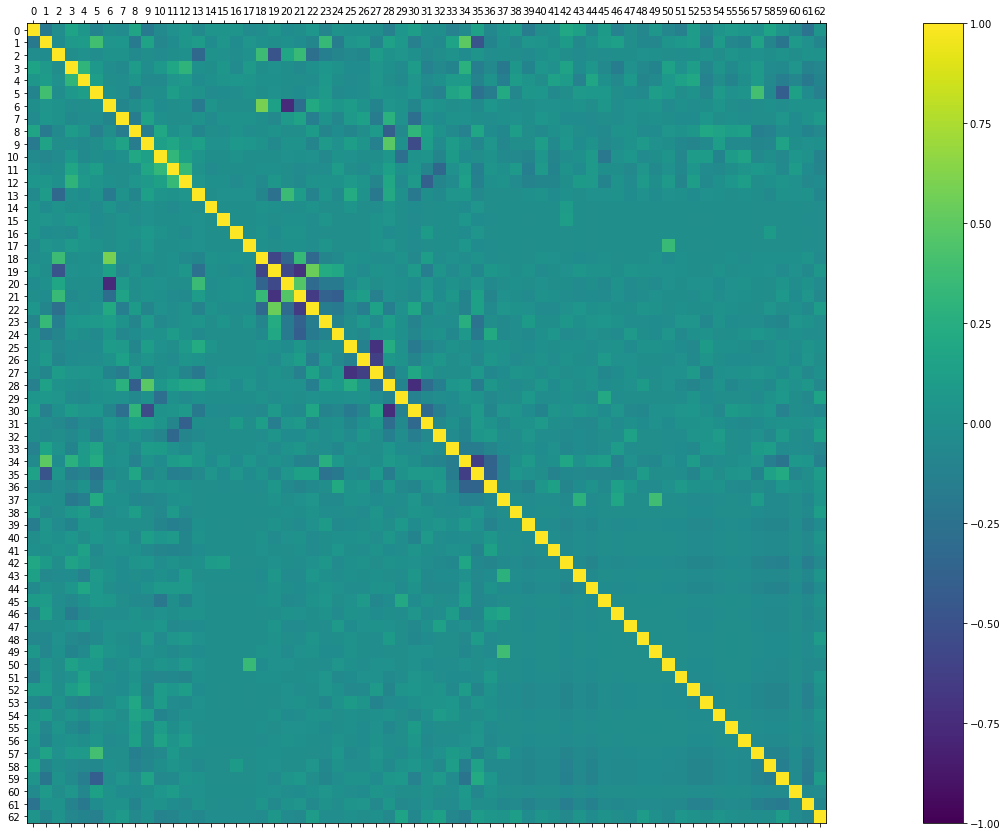

In [49]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure()
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df.head()
ticks = np.arange(0,63,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [50]:
from pandas.plotting import scatter_matrix

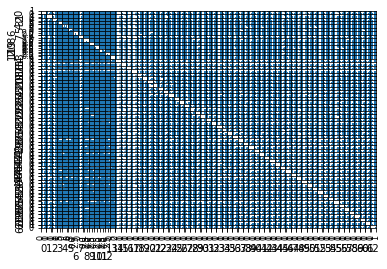

In [51]:
scatter_matrix(df)

pyplot.show()

In [52]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   53   54   55   56  \
0   0.0  1.0  0.0  3.0  2.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  1.0  3.0  2.0  1.0  3.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  3.0  2.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  5.0  4.0  1.0  1.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  5.0  4.0  1.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  5.0  4.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  1.0  2.0  6.0  1.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  1.0  2.0  6.0  3.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  1.0  2.0  6.0  0.0  1.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
9   0.0  1.0  0.0  5.0  2.0  2.0  1.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
10  0.0  1.0  1.0  5.0  2.0  2.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  5.0  2.0 

In [53]:
shape = df.shape
print(shape)

(2072, 63)


In [54]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
58    float64
59    float64
60    float64
61    float64
62    float64
Length: 63, dtype: object


In [55]:
from pandas import set_option

In [56]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

         gender  has_children  direction_same    income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed         Y
count  2072.000      2072.000        2072.000  2072.000   2072.000  ...                    2072.000            2072.000                                     2072.000               2072.000  2072.000
mean      0.492         0.448           0.202     3.433      2.946  ...                       0.112               0.123                                        0.009                  0.169     0.218
std       0.500         0.497           0.402     2.375      1.248  ...                       0.316               0.329                                        0.093                  0.375     0.413
min       0.000         0.000           0.000     0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000     0.000
25%       

In [57]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    1620
1     452
dtype: int64


In [58]:
correlations = df.corr(method='pearson')
print(correlations)

       0      1          2      3      4   ...         58     59     60     61     62
0   1.000 -0.192 -2.227e-02  0.158  0.062  ...  1.629e-01  0.037 -0.040 -0.241  0.034
1  -0.192  1.000 -2.576e-02  0.085  0.094  ... -8.711e-02 -0.225  0.083  0.012 -0.081
2  -0.022 -0.026  1.000e+00 -0.011  0.015  ... -4.461e-04  0.020 -0.008  0.019  0.028
3   0.158  0.085 -1.083e-02  1.000  0.311  ... -3.402e-02 -0.039  0.046 -0.107 -0.077
4   0.062  0.094  1.507e-02  0.311  1.000  ... -5.928e-02 -0.142 -0.071 -0.188 -0.100
..    ...    ...        ...    ...    ...  ...        ...    ...    ...    ...    ...
58  0.163 -0.087 -4.461e-04 -0.034 -0.059  ...  1.000e+00 -0.133 -0.033 -0.161 -0.010
59  0.037 -0.225  1.988e-02 -0.039 -0.142  ... -1.333e-01  1.000 -0.035 -0.169  0.108
60 -0.040  0.083 -8.286e-03  0.046 -0.071  ... -3.332e-02 -0.035  1.000 -0.042 -0.037
61 -0.241  0.012  1.929e-02 -0.107 -0.188  ... -1.607e-01 -0.169 -0.042  1.000 -0.086
62  0.034 -0.081  2.792e-02 -0.077 -0.100  ... -1.046e

In [59]:
skew = df.skew()
print(skew)

0     3.091e-02
1     2.098e-01
2     1.484e+00
3     4.893e-01
4     7.787e-04
        ...    
58    2.455e+00
59    2.296e+00
60    1.060e+01
61    1.764e+00
62    1.366e+00
Length: 63, dtype: float64


In [65]:
skew.to_csv('Skew2_PCA_Never.csv', index=False)

In [61]:
correlations.to_csv('correlations_PCA_Never.csv', index=False)

In [62]:
description.to_csv('description_PCA_Never.csv', index=False)

# Random Forest Tree

In [63]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

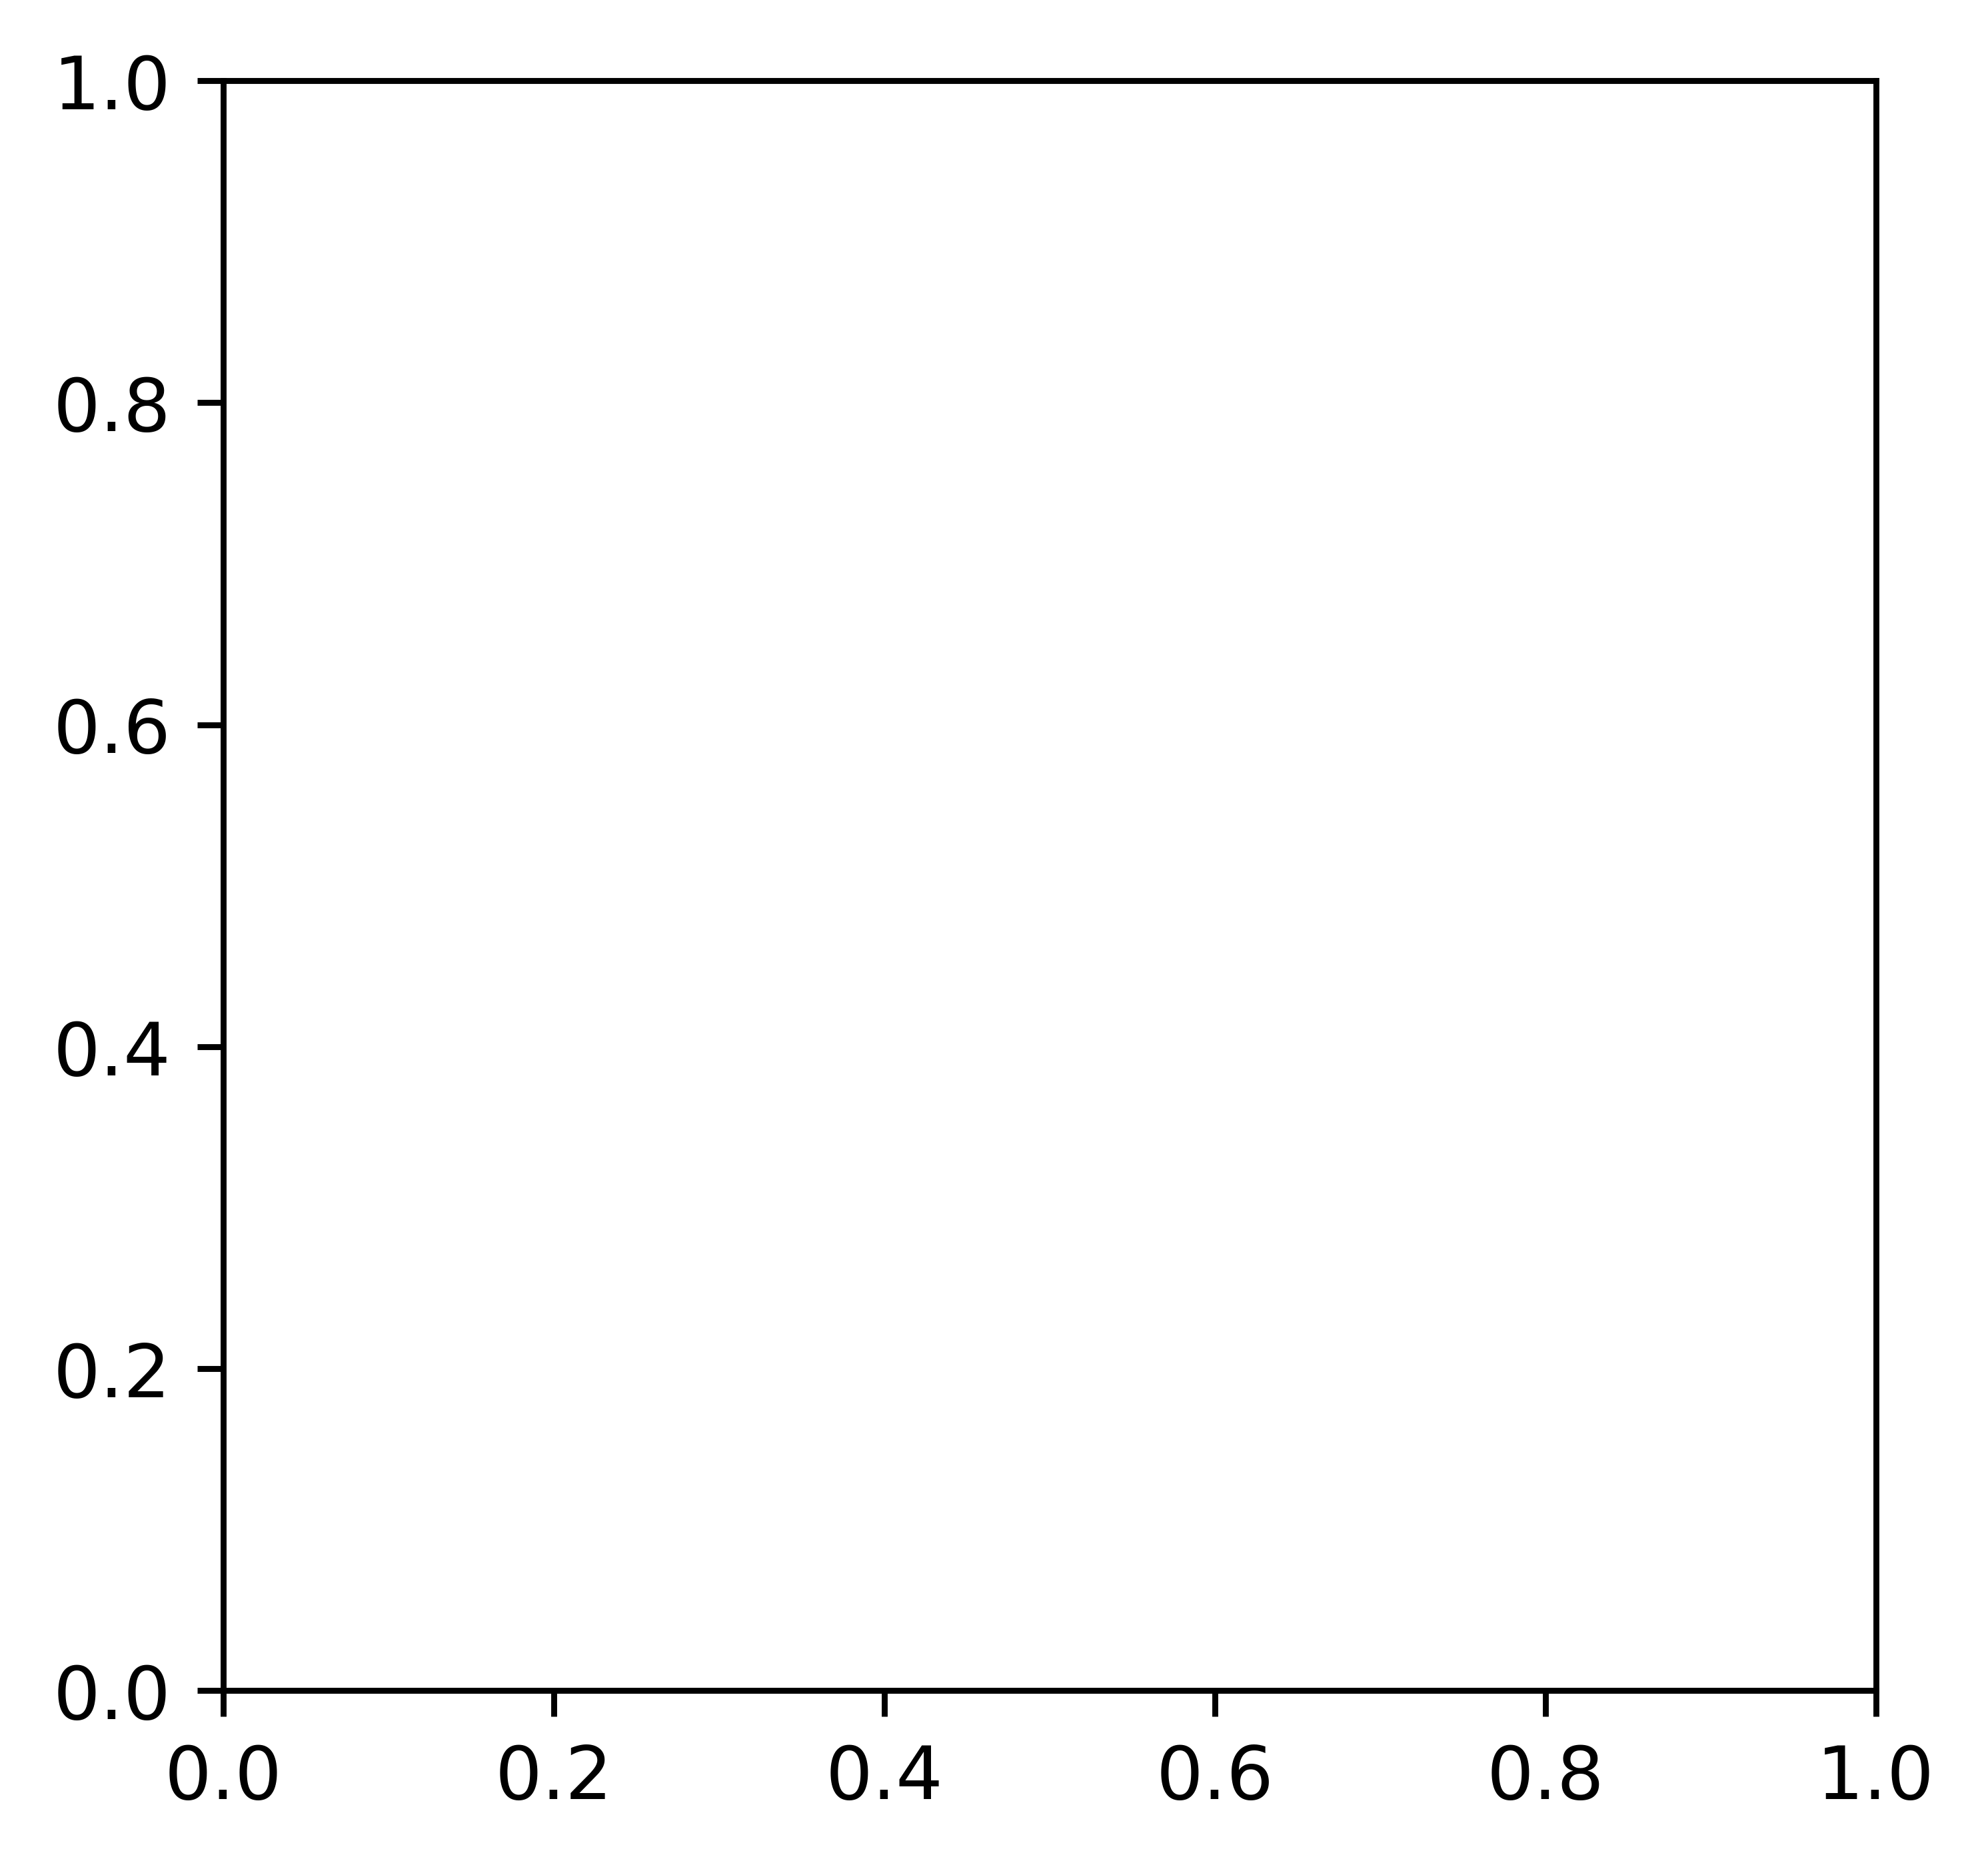

In [64]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_PCA_Never.png')